In [1]:
import pickle
import os
import numpy as np
import random
import pickle
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets
2023-12-05 21:35:26.174314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:


# Define the filenames for the pickle files
images = 'images.pkl'
labels = 'labels.pkl'
masks = 'masks.pkl'

# Load the images array from the pickle file
with open(images, 'rb') as file:
    images = pickle.load(file)

# Load the labels array from the pickle file
with open(labels, 'rb') as file:
    labels = pickle.load(file)

# Load the masks array from the pickle file
with open(masks, 'rb') as file:
    masks = pickle.load(file)
    
print(f"Images shape: {images.shape}")
print(f"Masks shape: {masks.shape}")
print(f"Labels shape: {labels.shape}")

Images shape: (113, 224, 224, 3)
Masks shape: (113, 224, 224)
Labels shape: (113,)


In [9]:
# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
    #rescale=1.0 / 255  # Add normalization here
)

In [10]:
# Apply data augmentation to the training set
images_augmented = []
labels_augmented = []
masks_augmented = []

for i in range(images.shape[0]):
    img = images[i]
    label = labels[i]
    mask = masks[i]

    # Reshape mask to (224, 224, 1) for compatibility with ImageDataGenerator
    mask = np.expand_dims(mask, axis=-1)

    for j in range(5):
        # Apply the same augmentation to both image and mask
        augmented_data = datagen.random_transform(np.concatenate((img, mask), axis=-1))

        # Separate augmented image and mask
        x_augmented = augmented_data[:, :, :3]
        mask_augmented = augmented_data[:, :, 3]

        images_augmented.append(x_augmented)
        labels_augmented.append(label)
        masks_augmented.append(mask_augmented)

# Convert lists to arrays
images_augmented = np.array(images_augmented)
labels_augmented = np.array(labels_augmented)
masks_augmented = np.array(masks_augmented)

# Ensure mask values are in the range [0, 1]
masks_augmented = np.where(masks_augmented > 0.5, 1, 0)

In [11]:
images_augmented = np.array(images_augmented)
labels_augmented = np.array(labels_augmented)
masks_augmented = np.array(masks_augmented)

print(f"Images shape: {images_augmented.shape}")
print(f"Masks shape: {masks_augmented.shape}")
print(f"Labels shape: {labels_augmented.shape}")

Images shape: (565, 224, 224, 3)
Masks shape: (565, 224, 224)
Labels shape: (565,)


In [12]:
# # Concatenate the loaded data
# images2 = np.concatenate((images_augmented, images), axis=0)
# labels2 = np.concatenate((labels_augmented, labels), axis=0)
# masks2 = np.concatenate((masks_augmented, masks), axis=0)

# # Now, you have NumPy arrays for the resized images, masks, and labels
# print(f"Images shape: {images2.shape}")
# print(f"Masks shape: {masks2.shape}")
# print(f"Labels shape: {labels2.shape}")


In [22]:
# Define the filenames for the pickle files
augmented_images_pickle_file = 'augmented_apal_images.pickle'
augmented_labels_pickle_file = 'augmented_apal_labels.pickle'
augmented_masks_pickle_file = 'augmented_apal_masks.pickle'

# Save the augmented images to a pickle file
with open(augmented_images_pickle_file, 'wb') as file:
    pickle.dump(images_augmented, file)

# Save the augmented labels to a pickle file
with open(augmented_labels_pickle_file, 'wb') as file:
    pickle.dump(labels_augmented, file)

# Save the augmented masks to a pickle file
with open(augmented_masks_pickle_file, 'wb') as file:
    pickle.dump(masks_augmented, file)

## YOLO APAL balancing

In [3]:


# Define the filenames for the pickle files
images = 'images_yolo.pkl'
labels = 'labels_yolo.pkl'


# Load the images array from the pickle file
with open(images, 'rb') as file:
    images = pickle.load(file)

# Load the labels array from the pickle file
with open(labels, 'rb') as file:
    labels = pickle.load(file)

    
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Images shape: (116, 224, 224, 3)
Labels shape: (116,)


In [4]:
print("Number of images:", len(images))
print("Number of labels:", len(labels))


Number of images: 116
Number of labels: 116


In [16]:
# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.01,
    height_shift_range=0.01,
    shear_range=0.01,
    brightness_range=[0.7, 1.0],
    fill_mode='nearest'
    #rescale=1.0 / 255  # Add normalization here
)

In [17]:
# Apply data augmentation to the training set
image_augmented = []
label_augmented = []

# Ensure the lengths of images and labels are the same
assert len(images) == len(labels), "Lengths of images and labels must be the same"

for i in range(len(images)):
    # Check if there are labels for the current image
    if i < len(labels):
        img = images[i]
        label = labels[i]

        # Repeat augmentation for each augmented image
        for j in range(5):
            x_augmented = datagen.random_transform(img)
            image_augmented.append(x_augmented)
            label_augmented.append(label)


In [15]:
# # ...

# image_augmented = []
# label_augmented = []

# # Ensure the lengths of images and labels are the same
# assert len(images) == len(labels), "Lengths of images and labels must be the same"

# for i in range(len(images)):
#     # Check if there are labels for the current image
#     if i < len(labels):
#         img = images[i]
#         label = labels[i]

#         # Repeat augmentation for each augmented image
#         for j in range(5):
#             x_augmented = datagen.random_transform(img)
#             image_augmented.append(x_augmented)

#             # Adjust bounding boxes in the labels
#             augmented_boxes = []
#             for box in label:
#                 class_label, center_x, center_y, width, height = box
#                 # Convert bounding box coordinates to the augmented image space
#                 x_min = max(0, center_x - width / 2)
#                 y_min = max(0, center_y - height / 2)
#                 x_max = min(1, center_x + width / 2)
#                 y_max = min(1, center_y + height / 2)

#                 # Apply the same augmentation to the bounding boxes
#                 bbox_array = np.array([x_min, y_min, x_max, y_max])
#                 bbox_array_augmented = datagen.apply_transform(
#                     bbox_array,
#                     transform_parameters=datagen.get_random_transform(x_augmented.shape),
#                 )

#                 # Convert augmented bounding box coordinates back to label format
#                 x_min_augmented, y_min_augmented, x_max_augmented, y_max_augmented = bbox_array_augmented
#                 center_x_augmented = (x_min_augmented + x_max_augmented) / 2
#                 center_y_augmented = (y_min_augmented + y_max_augmented) / 2
#                 width_augmented = x_max_augmented - x_min_augmented
#                 height_augmented = y_max_augmented - y_min_augmented

#                 augmented_boxes.append([class_label, center_x_augmented, center_y_augmented, width_augmented, height_augmented])

#             label_augmented.append(augmented_boxes)


In [18]:
images_augmented = np.array(image_augmented)
labels_augmented = np.array(label_augmented)

print(f"Images shape: {images_augmented.shape}")
print(f"Labels shape: {labels_augmented.shape}")

Images shape: (580, 224, 224, 3)
Labels shape: (580,)


/var/folders/ph/_s861md14q5c2ykky6q5pgd80000gn/T/ipykernel_82862/1863133111.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels_augmented = np.array(label_augmented)


In [19]:
# Define the filenames for the pickle files
augmented_images_pickle_file = 'augmented_apal_images_yolo.pickle'
augmented_labels_pickle_file = 'augmented_apal_labels_yolo.pickle'

# Save the augmented images to a pickle file
with open(augmented_images_pickle_file, 'wb') as file:
    pickle.dump(images_augmented, file)

# Save the augmented labels to a pickle file
with open(augmented_labels_pickle_file, 'wb') as file:
    pickle.dump(labels_augmented, file)

## model comparison

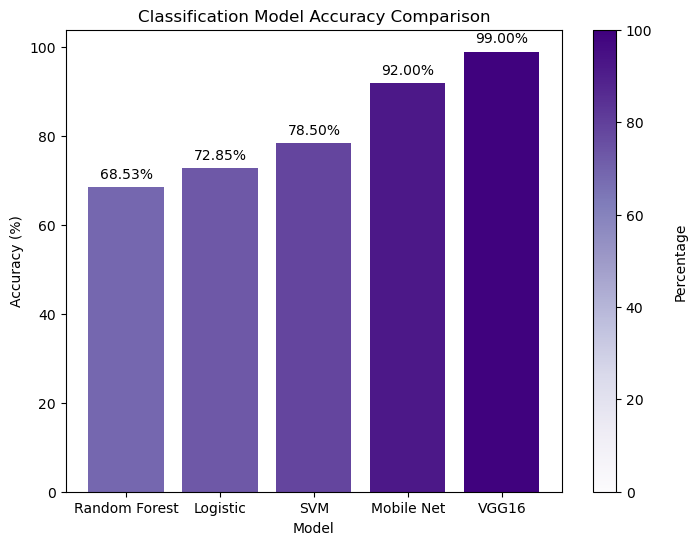

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Define the model names and their corresponding percentages
models = ['Random Forest', 'Logistic', 'SVM', 'Mobile Net', 'VGG16']
percentages = [68.53, 72.85, 78.5, 92, 99]

# Create a NumPy array from the percentages
percentages_array = np.array(percentages)

# Set the colormap to 'Purples'
colormap = plt.get_cmap('Purples')

# Set the figure size to 8x10 inches
plt.figure(figsize=(8, 6))

# Create a bar plot
bars = plt.bar(models, percentages_array, color=colormap(percentages_array / 100))

# Add labels and a title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Classification Model Accuracy Comparison')

# Create a scalar mappable to display a color bar
sm = ScalarMappable(cmap=colormap, norm=plt.Normalize(0, 100))
sm.set_array([])  # Set the range of values for the color bar

# Add the color bar to the side of the plot
cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.05)
cbar.set_label('Percentage', rotation=90, labelpad=15)

# Add percentage values on top of each bar
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{percentage:.2f}%', ha='center')

# Show the plot
plt.show()


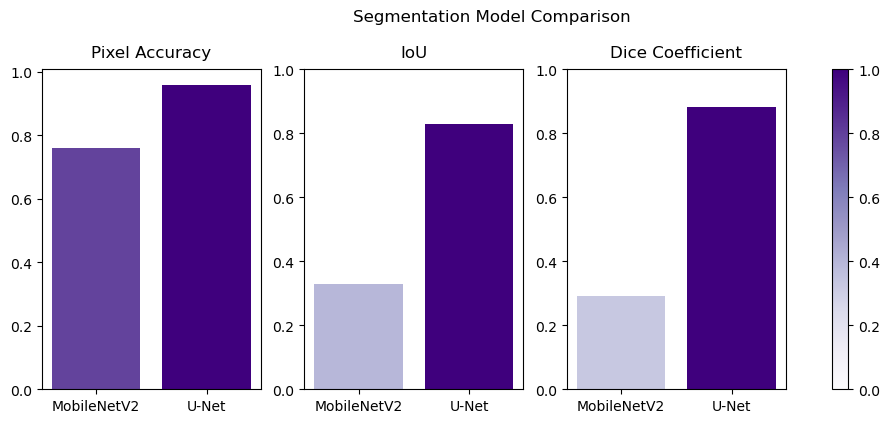

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Define the model names and their corresponding metrics
models = ['MobileNetV2', 'U-Net']
pixel_accuracy = [0.76, 0.96]
iou = [0.33, 0.83]
dice_coefficient = [0.29, 0.881]

# Set the colormap to 'Blues'
colormap = plt.get_cmap('Purples')

# Set the figure size to 12x5 inches
plt.figure(figsize=(12, 5))

# Create subplots for each metric
ax1 = plt.subplot(1, 3, 1)
bars1 = ax1.bar(models, pixel_accuracy, color=colormap(np.array(pixel_accuracy) / max(pixel_accuracy)))
ax1.set_title('Pixel Accuracy', y=0.95, pad=20)  # Adjust the y position of the title

ax2 = plt.subplot(1, 3, 2)
bars2 = ax2.bar(models, iou, color=colormap(np.array(iou) / max(iou)))
ax2.set_title('IoU', y=0.95, pad=20)  # Adjust the y position of the title
ax2.set_ylim(0, 1)  # Set y-axis limits explicitly

ax3 = plt.subplot(1, 3, 3)
bars3 = ax3.bar(models, dice_coefficient, color=colormap(np.array(dice_coefficient) / max(dice_coefficient)))
ax3.set_title('Dice Coefficient', y=0.95, pad=20)  # Adjust the y position of the title
ax3.set_ylim(0, 1)  # Set y-axis limits explicitly

# Adjust the layout to leave space for the titles
plt.subplots_adjust(top=0.75)

# Add labels and a title
plt.suptitle('Segmentation Model Comparison', y=0.87)  # Adjust the y position of the title

# Create a scalar mappable to display a color bar
sm = ScalarMappable(cmap=colormap, norm=plt.Normalize(0, 1))
sm.set_array([])  # Set the range of values for the color bar

# Add the color bar to the side of the plot
cbar = plt.colorbar(sm, ax=plt.gcf().get_axes(), pad=0.05)
#cbar.set_label('Normalized Value', rotation=90, labelpad=15)

# Show the plot
plt.show()


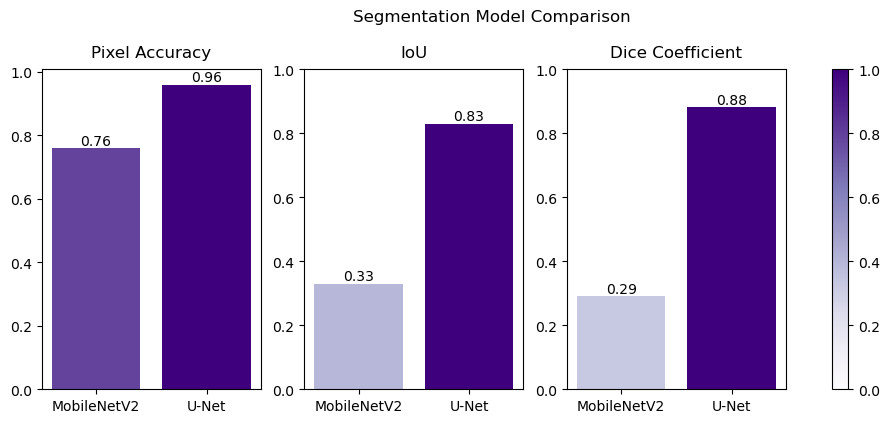

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Define the model names and their corresponding metrics
models = ['MobileNetV2', 'U-Net']
pixel_accuracy = [0.76, 0.96]
iou = [0.33, 0.83]
dice_coefficient = [0.29, 0.881]

# Set the colormap to 'Blues'
colormap = plt.get_cmap('Purples')

# Set the figure size to 12x5 inches
plt.figure(figsize=(12, 5))

# Create subplots for each metric
ax1 = plt.subplot(1, 3, 1)
bars1 = ax1.bar(models, pixel_accuracy, color=colormap(np.array(pixel_accuracy) / max(pixel_accuracy)))
ax1.set_title('Pixel Accuracy', y=0.95, pad=20)  # Adjust the y position of the title
# Add values on top of each bar
for bar, value in zip(bars1, pixel_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center')

ax2 = plt.subplot(1, 3, 2)
bars2 = ax2.bar(models, iou, color=colormap(np.array(iou) / max(iou)))
ax2.set_title('IoU', y=0.95, pad=20)  # Adjust the y position of the title
ax2.set_ylim(0, 1)  # Set y-axis limits explicitly
# Add values on top of each bar
for bar, value in zip(bars2, iou):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center')

ax3 = plt.subplot(1, 3, 3)
bars3 = ax3.bar(models, dice_coefficient, color=colormap(np.array(dice_coefficient) / max(dice_coefficient)))
ax3.set_title('Dice Coefficient', y=0.95, pad=20)  # Adjust the y position of the title
ax3.set_ylim(0, 1)  # Set y-axis limits explicitly
# Add values on top of each bar
for bar, value in zip(bars3, dice_coefficient):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center')

# Adjust the layout to leave space for the titles
plt.subplots_adjust(top=0.75)

# Add labels and a title
plt.suptitle('Segmentation Model Comparison', y=0.87)  # Adjust the y position of the title

# Create a scalar mappable to display a color bar
sm = ScalarMappable(cmap=colormap, norm=plt.Normalize(0, 1))
sm.set_array([])  # Set the range of values for the color bar

# Add the color bar to the side of the plot
cbar = plt.colorbar(sm, ax=plt.gcf().get_axes(), pad=0.05)
#cbar.set_label('Normalized Value', rotation=90, labelpad=15)

# Show the plot
plt.show()
